In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load the dataset into python environment

In [2]:
data_df= pd.read_csv("titanic_dataset.csv")
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Make ‘PassengerId’ as the index column

In [5]:
data=data_df.set_index('PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Check the basic details of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.shape

(891, 11)

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Fill in all the missing values present in all the columns in the dataset

In [11]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [12]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

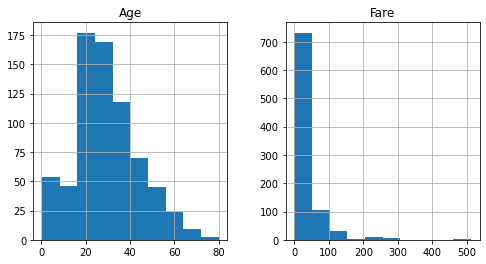

In [13]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,4))
plt.show()

In [14]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [15]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and handle outliers in at least 3 columns in the dataset

[]

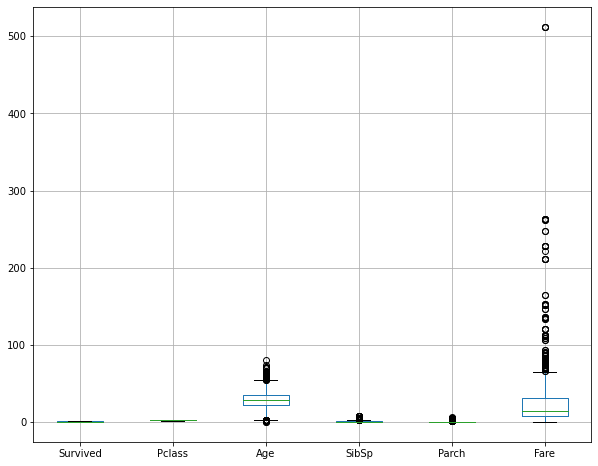

In [18]:
plt.figure(figsize=(10,8))
data.boxplot(return_type='dict')
plt.plot()

In [19]:
#boxplot of age

{'whiskers': [<matplotlib.lines.Line2D at 0x1a780603e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7806135b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a780603ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a780613cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a78061f0a0>],
 'means': []}

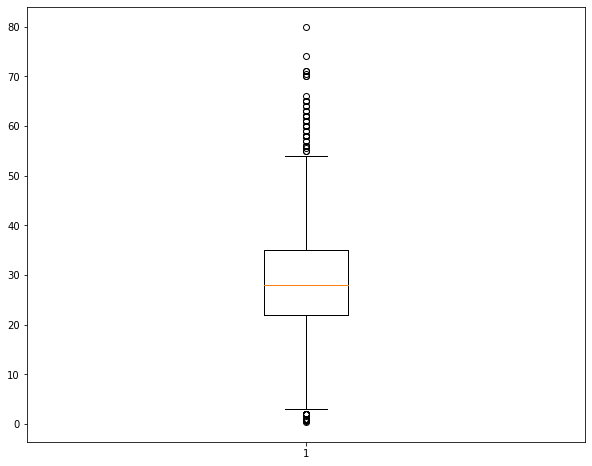

In [20]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Age'])

In [21]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print('low_lim=',low_lim)
print('Up_lim=',Up_lim)

Q1= 22.0
Q2= 28.0
Q3= 35.0
low_lim= 2.5
Up_lim= 54.5


In [22]:
outlier=[]
for x in data['Age']:
    if(x>Up_lim)or (x<low_lim):
        outlier.append(x)

In [23]:
Age_Outlier=data[(data['Age']>Up_lim) | (data['Age']<low_lim)]
Age_Outlier.index

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [24]:
data.drop([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a780917820>,
 'caps': [<matplotlib.lines.Line2D at 0x1a780917e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a780917460>],
 'medians': [<matplotlib.lines.Line2D at 0x1a780921580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a780921910>],
 'means': []}

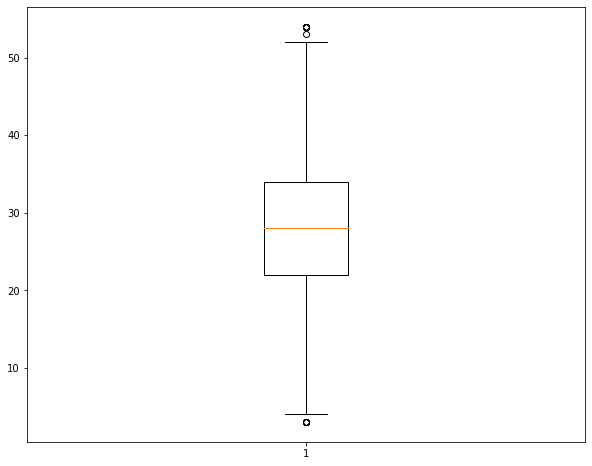

In [25]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Age'])

In [26]:
#outlier for Fare

{'whiskers': [<matplotlib.lines.Line2D at 0x1a78097b070>,
 'caps': [<matplotlib.lines.Line2D at 0x1a78097b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a78096dca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a78097bf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7809862e0>],
 'means': []}

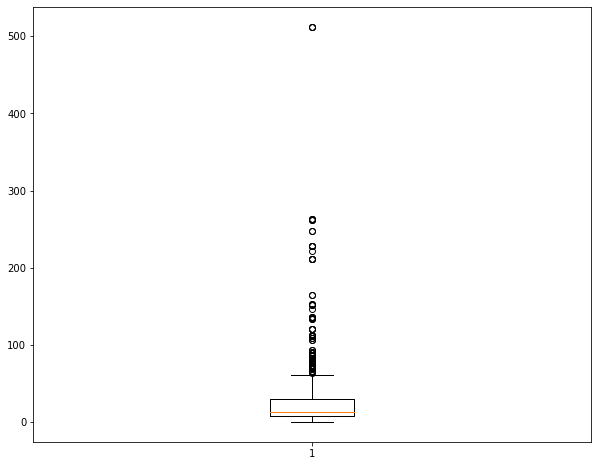

In [27]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Fare'])

In [28]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print('low_lim=',low_lim)
print('Up_lim=',Up_lim)

Q1= 7.8958
Q2= 13.4167
Q3= 30.0708
low_lim= -25.366699999999994
Up_lim= 63.333299999999994


In [29]:
outlier=[]
for x in data['Fare']:
    if(x>Up_lim)or (x<low_lim):
        outlier.append(x)

In [30]:
index=data['Fare'][(data['Fare']>Up_lim)|(data['Fare']<low_lim)].index
index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [31]:
data.drop(index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a780c1da30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a780c2b070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a780c1d6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a780c2b790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a780c2bb20>],
 'means': []}

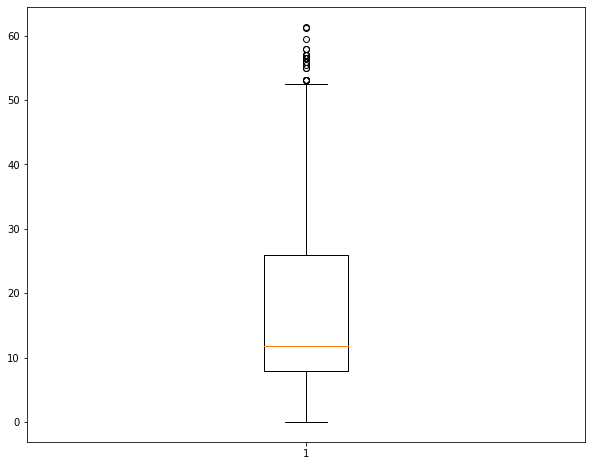

In [32]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Fare'])

In [33]:
#outlier for SibSp

Text(0.5, 1.0, 'Box plot of SibSp')

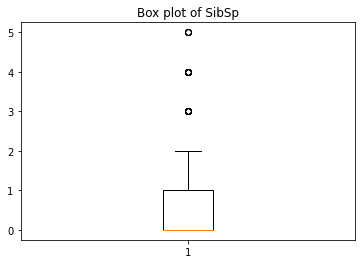

In [34]:

plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [35]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
low_lim= -1.5
up_lim= 2.5


In [36]:
outlier=[]
for x in data['SibSp']:
    if ((x<low_lim)or (x>up_lim)):
        outlier.append(x)

In [37]:
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [38]:
ind1=data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [39]:
data.drop([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],inplace=True)

# Do min max scaling on the feature set (Take ‘Survived’ as target)

In [40]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [41]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
PassengerId,,
1,0,1
3,0,1
4,0,1
5,0,1
6,1,0


In [43]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis =1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,28.0,0,0,8.4583


In [44]:
data=pd.concat([data,sex,embark],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
6,0,3,28.0,0,0,8.4583,1,1,0


<AxesSubplot:>

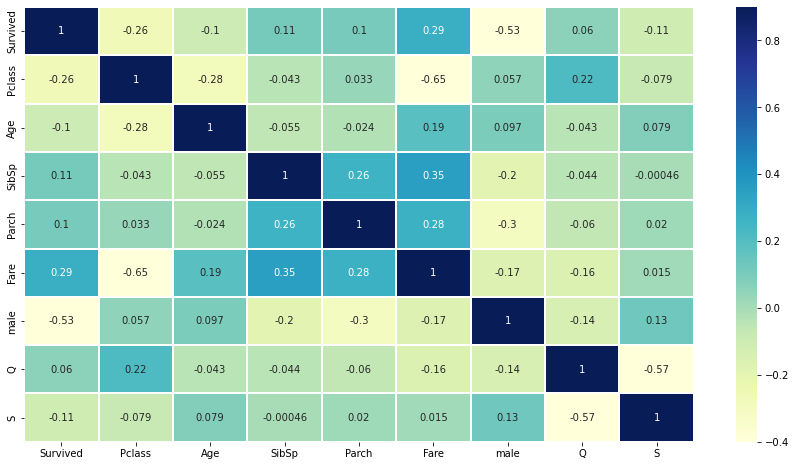

In [45]:
corrmatrix = data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [46]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [48]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.1431316043931618


In [50]:
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions))

R squared value is: 0.38566637952143945


In [51]:
#min max scaling

In [52]:
from sklearn import preprocessing
X=data.drop('Survived',axis=1)
X.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,28.711176,0.272859,0.269956,16.631246,0.687954,0.098694,0.750363
std,0.723586,9.545220,0.501020,0.754625,13.092563,0.463665,0.298467,0.433117
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,10.500000,1.000000,0.000000,1.000000
75%,3.000000,33.000000,0.000000,0.000000,23.450000,1.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,61.379200,1.000000,1.000000,1.000000


In [53]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

In [54]:
X=min_max.fit_transform(X)

In [55]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7
count,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.504141,0.13643,0.044993,0.270959,0.687954,0.098694,0.750363
std,0.361793,0.187161,0.25051,0.125771,0.213306,0.463665,0.298467,0.433117
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962,0.000000,0.000000,1.000000
50%,1.000000,0.490196,0.00000,0.000000,0.171068,1.000000,0.000000,1.000000
75%,1.000000,0.588235,0.00000,0.000000,0.382051,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.1431316043931618
R squared value is: 0.38566637952143945
